# Библиотека pandas

Очень часто различные наборы данных могут быть представлены в табличном виде. В этом случае для python существует библиотека pandas, то которая облегчает работу с табличным представлением.

Наш пример мы построим на наборе входных данных для задачи про пассажиров титаника. Подключим библиотеку pandas и загрузим набор данных из csv файла.

In [1]:
import pandas as pd

dataset = pd.read_csv('../../../datasets/titanic/train.csv')

Выведем первые строки

In [2]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Выведем краткую информацию по набору данных

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Видно, что в наборе 891 строк. При этом в столбцах Age, Cabin и Embarked есть пропущенные значения.

Подключим библиотеку для построения графиков matplotlib с помощью магической команды pylab и библиотеку seaborn.

In [14]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Посмотрим как соотносятся число спасшихся и погибших.

In [11]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

И в графическом виде

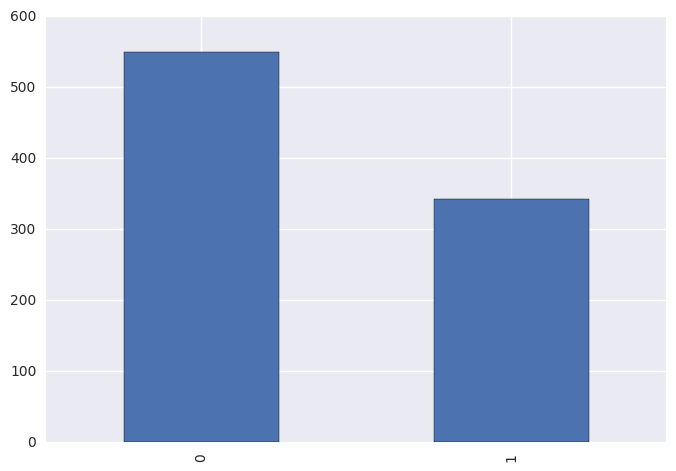

In [22]:
dataset['Survived'].value_counts().plot.bar()

Посмотрим как пол пассажира влияет на вероятность его спасения.

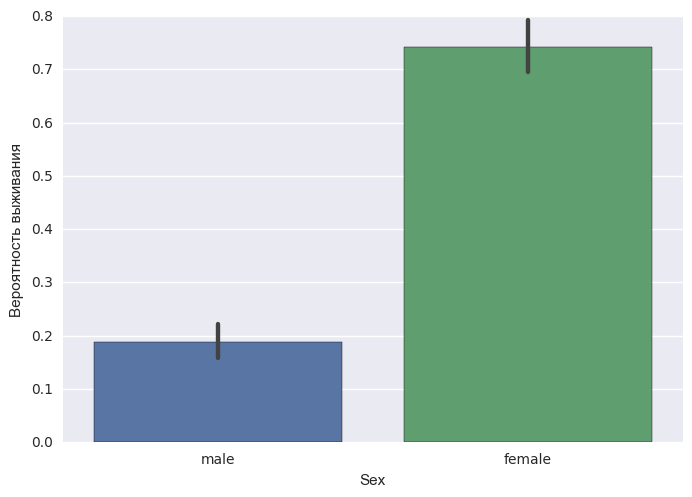

In [43]:
ax = sns.barplot(x='Sex', y='Survived', data=dataset)
ax.set_ylabel(ylabel='Вероятность выживания')

И аналогичное распреджеление в зависимости от класса кабины

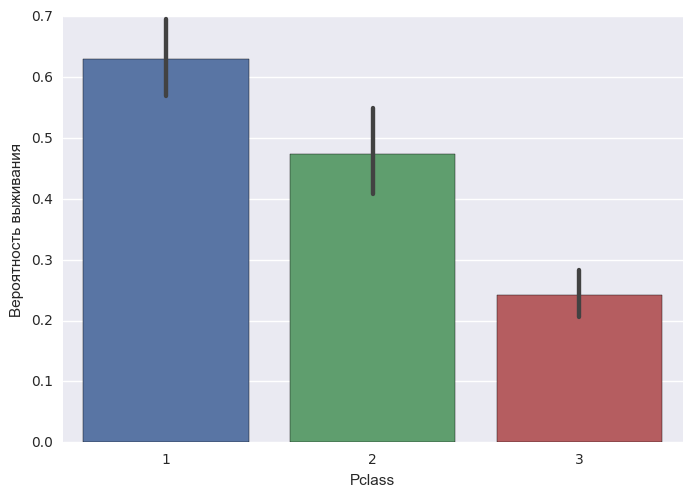

In [46]:
ax = sns.barplot(x="Pclass", y="Survived", data=dataset)
ax.set_ylabel('Вероятность выживания')

Построим распределение цены для каждого класса отдельно.

## Кодирование признаков и подготовка данных

Для начала закодируем пол числами 0 и 1

In [51]:
dataset['Sex'] = dataset['Sex'].map(lambda s: {'male': 0, 'female': 1}[s])

Далее заполним пропущенные значения возраста, положив их равным среднему возрасту.

In [53]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

Порт посадки зхаполним самым популярным.

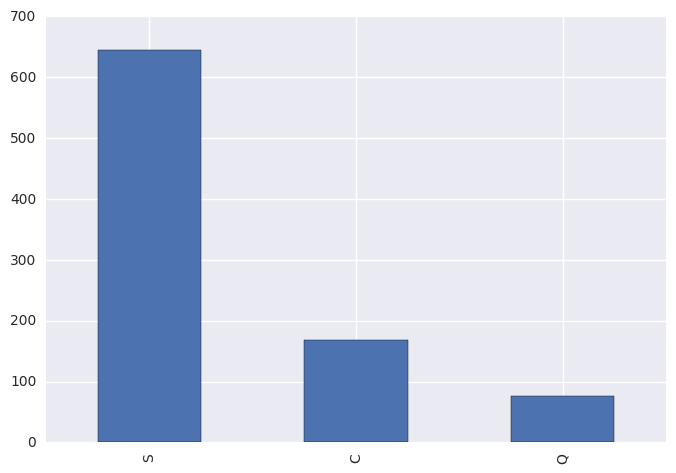

In [61]:
dataset['Embarked'].value_counts().plot.bar()
most_popular_embarked = dataset['Embarked'].value_counts().argmax()
dataset['Embarked'] = dataset['Embarked'].fillna(most_popular_embarked)

## Простейший классификатор

Построим простой классификатор, который отталкивается только от пола пассажира. Если пассажир - женщина, то предположим, что она выживет. Если мужчина - то погибнет.

Загрузим тестовую выборку.

In [63]:
test = pd.read_csv('../../../datasets/titanic/test.csv')

Подготовим таблицу с ответами.

In [70]:
submission = test['PassengerId'].to_frame()

И заполним ее с помощью нашего классификатора.

In [72]:
submission['Survived'] = test['Sex'].map(lambda s: 1 if s == 'female' else 0)

и сохраним ответ в CSV файл без отдельного столбца с индексами.

In [80]:
submission.to_csv('../../../datasets/submssion.csv', index=False)

Проверим, что ответ сохранился в правильном формате.

In [81]:
!head ../../../datasets/submssion.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
